In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil

os.listdir("/content/drive/MyDrive/dataset/train")

['1', '0']

In [ ]:
os.listdir("/content/drive/MyDrive/dataset/v")

['1', '0']

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMG_SHAPE  = 224
batch_size = 32

In [ ]:
from tensorflow import keras

base_model = keras.applications.VGG19(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

base_model.summary()

base_model.trainable = False

inputs = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False 
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

80150528/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
# Important to use binary crossentropy and binary accuracy as we now have a binary classification problem
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])


from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create a data generator
datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) # we don't expect Bo to be upside-down so we will not flip vertically

# load and iterate training dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/dataset/train', 
                                       target_size=(224, 224), 
                                       color_mode='rgb', 
                                       class_mode='binary', 
                                       batch_size=8)
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('/content/drive/MyDrive/dataset/v', 
                                      target_size=(224, 224), 
                                      color_mode='rgb', 
                                      class_mode='binary', 
                                      batch_size=8)

h1= model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, workers=10, epochs=20)

Found 44 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Epoch 1/20
12/12 [==============================] - 79s 6s/step - loss: 1.0439 - binary_accuracy: 0.5455 - val_loss: 1.4779 - val_binary_accuracy: 0.3750
Epoch 2/20
12/12 [==============================] - 72s 6s/step - loss: 0.6777 - binary_accuracy: 0.6364 - val_loss: 1.2915 - val_binary_accuracy: 0.5312
Epoch 3/20
12/12 [==============================] - 72s 6s/step - loss: 0.5703 - binary_accuracy: 0.7273 - val_loss: 0.8495 - val_binary_accuracy: 0.5938
Epoch 4/20
12/12 [==============================] - 73s 6s/step - loss: 0.5036 - binary_accuracy: 0.7727 - val_loss: 0.6513 - val_binary_accuracy: 0.6562
Epoch 5/20
12/12 [==============================] - 72s 6s/step - loss: 0.5029 - binary_accuracy: 0.8068 - val_loss: 1.4212 - val_binary_accuracy: 0.5312
Epoch 6/20
12/12 [==============================] - 74s 6s/step - loss: 0.4634 - binary_accuracy: 0.8068 - val_loss: 1.2287 - val_binary_accuracy: 0.5

In [ ]:
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are taken into account
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .000001),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

history = model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, workers=10, epochs=20)

Epoch 1/20
12/12 [==============================] - 216s 18s/step - loss: 0.1256 - binary_accuracy: 0.9545 - val_loss: 0.7544 - val_binary_accuracy: 0.7812
Epoch 2/20
12/12 [==============================] - 210s 17s/step - loss: 0.1233 - binary_accuracy: 0.9545 - val_loss: 0.9721 - val_binary_accuracy: 0.7188
Epoch 3/20
12/12 [==============================] - 211s 18s/step - loss: 0.0871 - binary_accuracy: 0.9773 - val_loss: 0.9995 - val_binary_accuracy: 0.7812
Epoch 4/20
12/12 [==============================] - 213s 18s/step - loss: 0.0882 - binary_accuracy: 0.9659 - val_loss: 0.9597 - val_binary_accuracy: 0.6875
Epoch 5/20
12/12 [==============================] - 212s 18s/step - loss: 0.0602 - binary_accuracy: 1.0000 - val_loss: 0.8896 - val_binary_accuracy: 0.7500
Epoch 6/20
12/12 [==============================] - 216s 18s/step - loss: 0.0365 - binary_accuracy: 1.0000 - val_loss: 0.9619 - val_binary_accuracy: 0.8125
Epoch 7/20
12/12 [==============================] - 215s 18s/ste

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


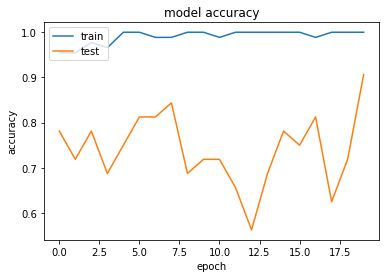

In [ ]:
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

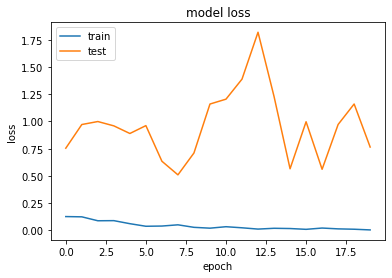

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()